## Time Series Challenge
In this challenge, we will compare the various time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales dataset. You can choose your own category or predict the overall sales.

> #### Note
> We have one order in every row, thus don't forget to transform the data into a time series format first. The data can be transformed into a daily, weekly or monthly time series.

In [44]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [144]:
df = pd.read_excel('superstore.xls')

In [145]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [146]:
df = df[['Order Date', 'Sales']]
df.columns = ['ds', 'y']

In [147]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [148]:
df = df.groupby('ds')['y'].sum().reset_index()

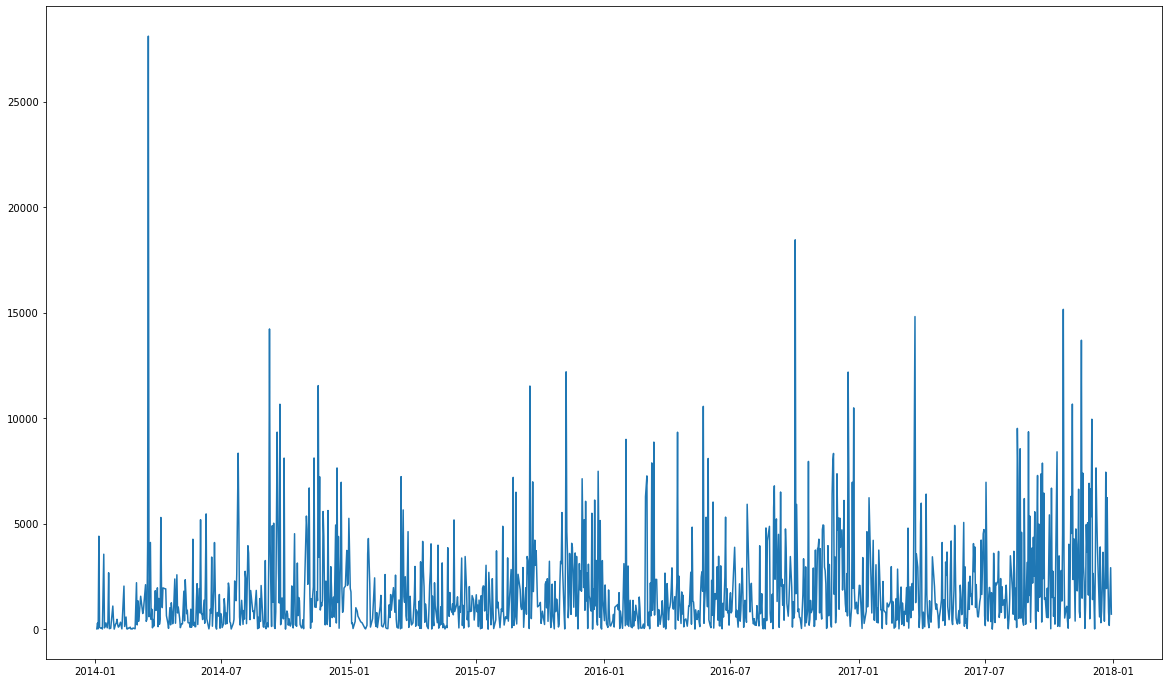

In [75]:
plt.subplots(figsize = (20,12))
plt.plot(df.ds,df.y)

In [151]:
# setting index using existing column
df = df.set_index('ds')

In [152]:
# Resample time-series data
y = df.y.resample('M').mean()

In [86]:
y.head()

ds
2014-01-31     647.131591
2014-02-28     225.994600
2014-03-31    2320.458708
2014-04-30    1178.972708
2014-05-31     844.581679
Freq: M, Name: y, dtype: float64

<AxesSubplot:xlabel='ds'>

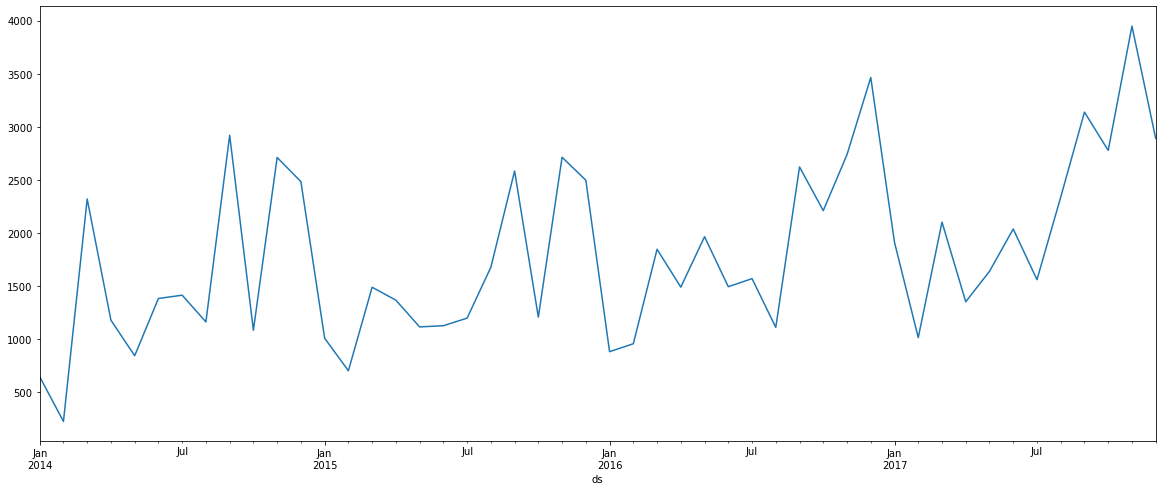

In [90]:
y.plot(figsize=(20,8))

In [91]:
# MOVING AVERAGE
X = y.values

In [92]:
X

array([ 647.13159091,  225.9946    , 2320.45870833, 1178.97270833,
        844.58167857, 1383.805104  , 1414.43304167, 1162.89452083,
       2920.61967143, 1084.59975862, 2711.33505862, 2483.77216071,
       1009.67086667,  703.02417647, 1489.47123077, 1367.80834   ,
       1115.98838889, 1127.14963636, 1198.55520833, 1677.19691818,
       2583.83672   , 1207.88167308, 2713.30583929, 2497.31737333,
        882.9757619 ,  957.450625  , 1846.99553571, 1490.38611538,
       1965.09406897, 1494.242     , 1570.47852   , 1111.26336786,
       2621.78660357, 2210.65722222, 2738.34364828, 3464.25153571,
       1911.79886957, 1015.05667   , 2102.58402857, 1352.64948519,
       1639.30037778, 2037.75868077, 1560.84193103, 2337.81066667,
       3138.09471429, 2777.74725714, 3948.26083333, 2890.66616552])

predicted=1064.528300, expected=1178.972708
predicted=1241.808672, expected=844.581679
predicted=1448.004365, expected=1383.805104
predicted=1135.786497, expected=1414.433042
predicted=1214.273275, expected=1162.894521
predicted=1320.377555, expected=2920.619671
predicted=1832.649078, expected=1084.599759
predicted=1722.704650, expected=2711.335059
predicted=2238.851496, expected=2483.772161
predicted=2093.235659, expected=1009.670867
predicted=2068.259362, expected=703.024176
predicted=1398.822401, expected=1489.471231
predicted=1067.388758, expected=1367.808340
predicted=1186.767916, expected=1115.988389
predicted=1324.422653, expected=1127.149636
predicted=1203.648788, expected=1198.555208
predicted=1147.231078, expected=1677.196918
predicted=1334.300588, expected=2583.836720
predicted=1819.862949, expected=1207.881673
predicted=1822.971770, expected=2713.305839
predicted=2168.341411, expected=2497.317373
predicted=2139.501629, expected=882.975762
predicted=2031.199658, expected=957

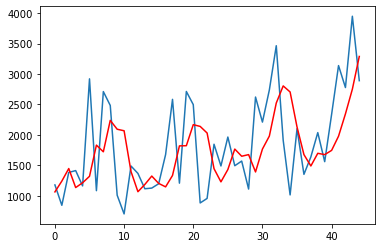

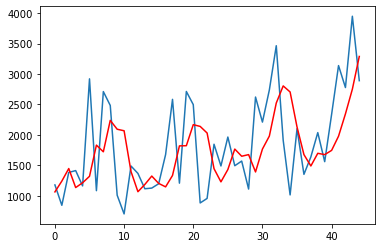

In [94]:
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

In [99]:
from prophet import Prophet

In [109]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
future = m.make_future_dataframe(periods=365)
# future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1597,2018-12-26,2150.179179,-667.567158,5001.751021
1598,2018-12-27,3249.734484,457.524144,6175.159966
1599,2018-12-28,3412.240486,758.102250,6118.145438
1600,2018-12-29,2909.120472,12.903244,5826.956836
1601,2018-12-30,2983.796767,133.632074,5742.060347


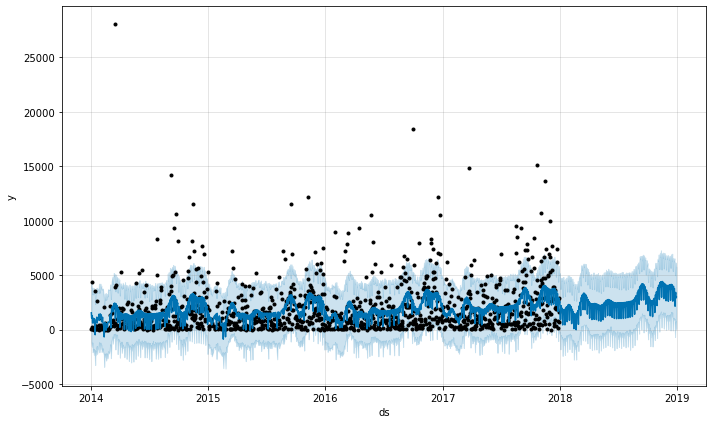

In [111]:
fig1 = m.plot(forecast)

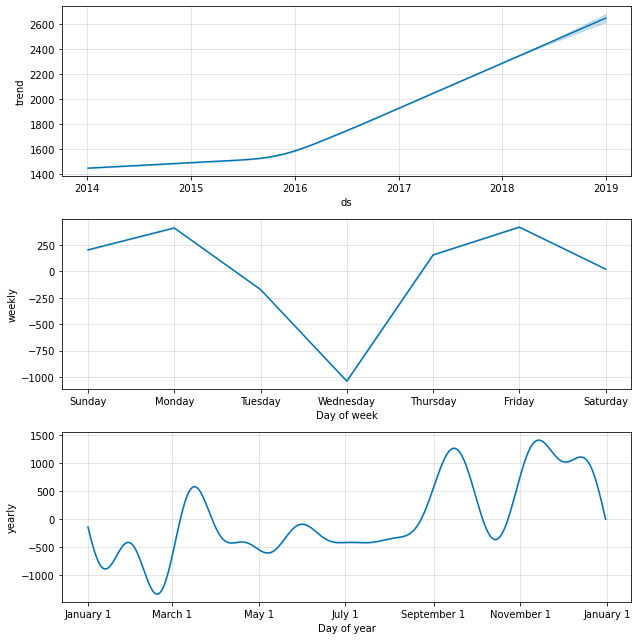

In [112]:
fig2 = m.plot_components(forecast)

In [153]:
X = y.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

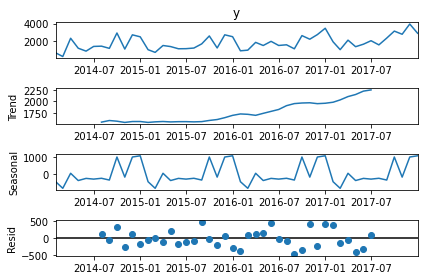

In [154]:
# ARIMA
decomposition = seasonal_decompose(y, model='additive').plot()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -379.384
Date:                Wed, 02 Feb 2022   AIC                            764.768
Time:                        19:09:17   BIC                            770.319
Sample:                    01-31-2014   HQIC                           766.857
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1801      0.240      0.751      0.453      -0.290       0.650
ma.L1         -0.8457      0.134     -6.313      0.000      -1.108      -0.583
sigma2       5.87e+05   1.27e+05      4.604      0.0

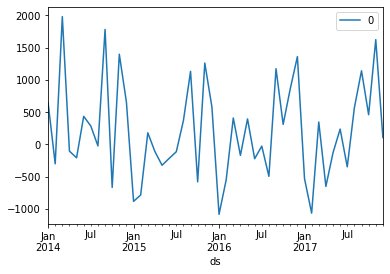

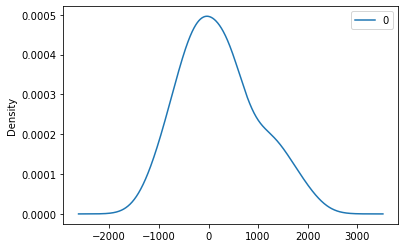

In [165]:
# fit model
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()

# density plot of residuals
residuals.plot(kind='kde').plot()

# summary stats of residuals
print(residuals.describe())

In [166]:
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2544.516316, expected=1111.263368
predicted=1965.067689, expected=2621.786604
predicted=2408.652955, expected=2210.657222
predicted=2291.654478, expected=2738.343648
predicted=2454.195579, expected=3464.251536
predicted=2712.344678, expected=1911.798870
predicted=2266.561561, expected=1015.056670
predicted=1945.836472, expected=2102.584029
predicted=2235.141154, expected=1352.649485
predicted=1986.579278, expected=1639.300378
predicted=2035.073534, expected=2037.758681
predicted=2139.085405, expected=1560.841931
predicted=1976.569369, expected=2337.810667
predicted=2202.584654, expected=3138.094714
predicted=2473.718165, expected=2777.747257
predicted=2400.217603, expected=3948.260833
predicted=2829.204645, expected=2890.666166


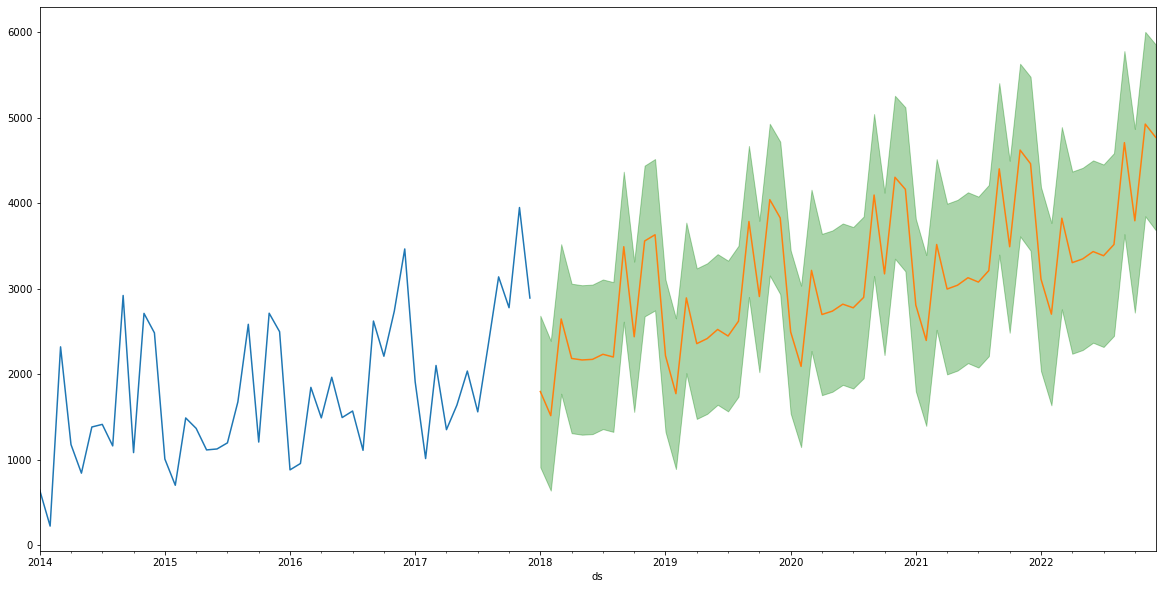

In [195]:
# visualize forcast
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='green', alpha=.33)